In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
import itertools
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

C:\Users\57321\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r'siniestros_con_hipotesis.csv', index_col=0)

In [3]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.head()

,CODIGO_SINIESTRO,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE_CON,OBJETO_FIJO,DIRECCION,TOTAL_MUERTOS,TOTAL_HERIDOS,...,DESCRIPCION2,CODIGO_CAUSA3,DESCRIPCION3,CODIGO_CAUSA4,DESCRIPCION4,Hora,Dia,Mes,ILESOS,ANO
0,4401423,2015-01-01,09:45:00,Con Heridos,Choque,Vehiculo,NaN,CL 66A-KR 76 02,0,2,...,NaN,NaN,NaN,NaN,NaN,9,3,1,0.0,2015
1,4401425,2015-01-01,13:25:00,Solo Daños,Choque,Vehiculo,NaN,CL 143A-KR 142 02,0,0,...,EMBRIAGUEZ O DROGA,NaN,NaN,NaN,NaN,13,3,1,3.0,2015
2,4401430,2015-01-01,07:15:00,Con Heridos,Volcamiento,NaN,NaN,KR 19D-CL 62 S 02,0,1,...,NaN,NaN,NaN,NaN,NaN,7,3,1,0.0,2015
3,4401433,2015-01-01,20:30:00,Solo Daños,Choque,Vehiculo,NaN,AK 7-CL 43 33,0,0,...,NaN,NaN,NaN,NaN,NaN,20,3,1,2.0,2015
4,4401437,2015-01-01,12:50:00,Solo Daños,Choque,Vehiculo,NaN,DG 77A-AK 18D 02,0,0,...,ADELANTAR INVADIENDO VIA,NaN,NaN,NaN,NaN,12,3,1,2.0,2015


In [4]:
siniestros = pd.DataFrame(df.groupby('FECHA')['CODIGO_SINIESTRO'].count().reset_index(name='Cantidad_siniestros'))

In [5]:
siniestros = siniestros.sort_values(by=['FECHA'])
siniestros.tail()

,FECHA,Cantidad_siniestros
1821,2019-12-27,83
1822,2019-12-28,63
1823,2019-12-29,50
1824,2019-12-30,79
1825,2019-12-31,63


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


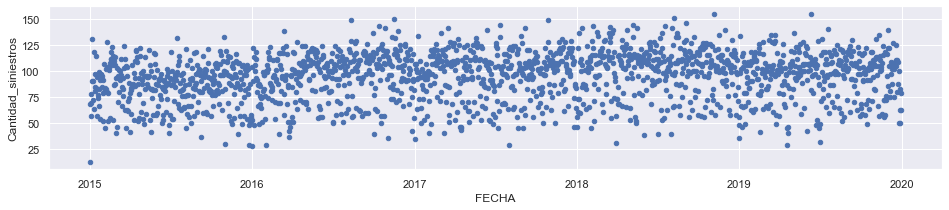

In [6]:
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(16,3)})
ax = siniestros.plot(kind='scatter', x='FECHA', y='Cantidad_siniestros')


In [7]:
accidentes = pd.DataFrame(siniestros.set_index('FECHA'))
accidentes

,Cantidad_siniestros
FECHA,
2015-01-01,13
2015-01-02,68
2015-01-03,69
2015-01-04,78
2015-01-05,57
...,...
2019-12-27,83
2019-12-28,63
2019-12-29,50


In [8]:
y = pd.Series(accidentes['Cantidad_siniestros'].resample('MS').mean())
y.head()

FECHA
2015-01-01    82.258065
2015-02-01    93.071429
2015-03-01    85.000000
2015-04-01    88.400000
2015-05-01    84.870968
Freq: MS, Name: Cantidad_siniestros, dtype: float64

In [9]:
y=accidentes.copy()

In [10]:
len(y)

1826

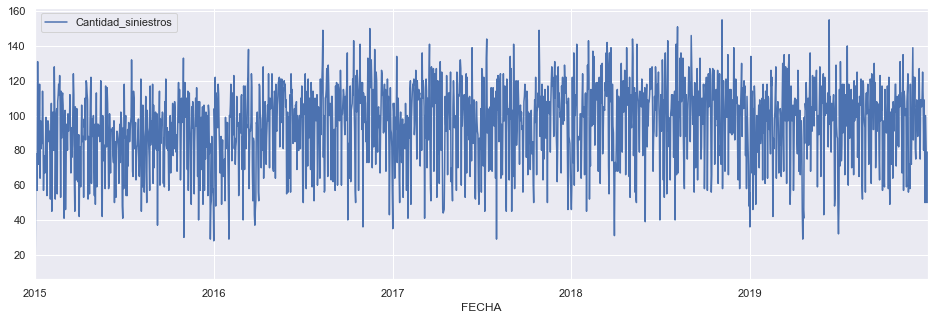

In [11]:
y.plot(figsize=(16, 5))
plt.show()

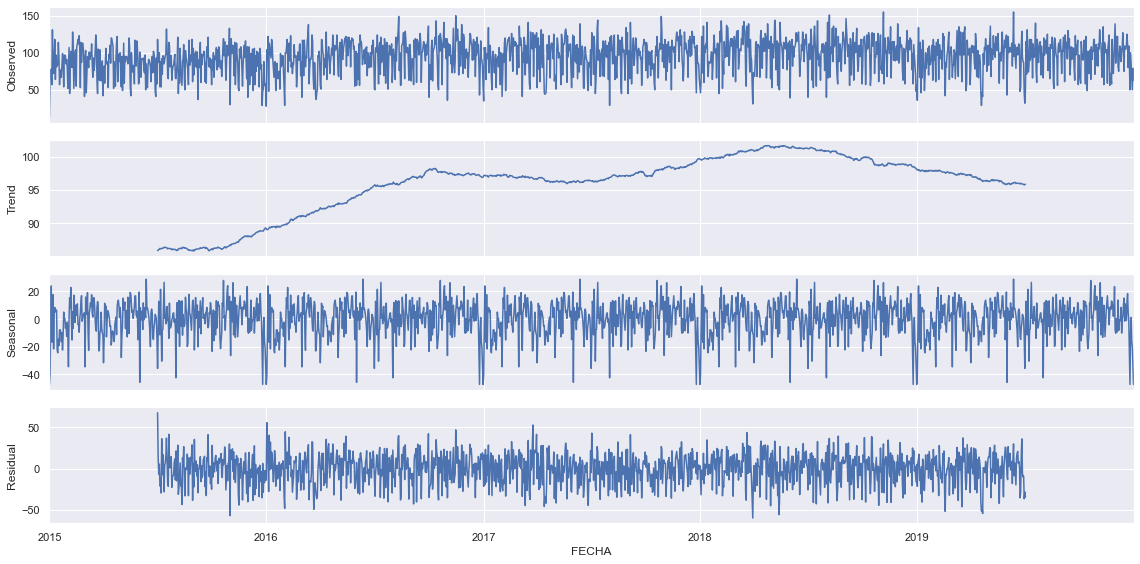

In [12]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=365)
fig = decomposition.plot()
plt.show()

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:21906.860086091227
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:20218.214704209764
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:17673.289774806904
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:16412.23291978
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:17640.71229383717
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:16521.906223584443
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:17047.35029594105
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:16414.229851021326
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:20203.684561853355
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:19212.19052702205
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:17641.260860720453
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:16377.436981526476
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:17603.74004273101
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:16485.29955806177
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:17022.987892192323
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:16379.3719138492
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:17575.3176564163
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:17458.727374304155
ARIMA

In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1171      0.023      5.148      0.000       0.073       0.162
ma.L1         -1.0000      1.337     -0.748      0.455      -3.621       1.621
ar.S.L12      -0.5016      0.022    -23.002      0.000      -0.544      -0.459
sigma2       740.6024    993.044      0.746      0.456   -1205.729    2686.934


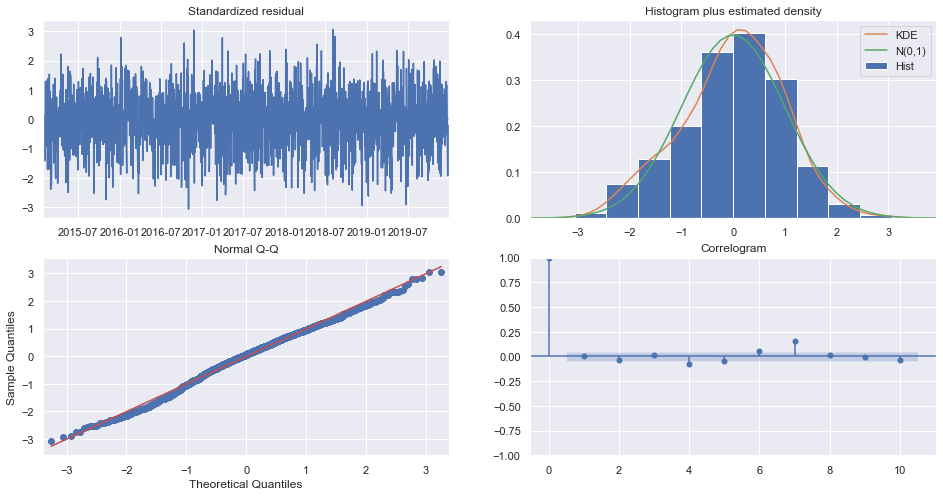

In [17]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

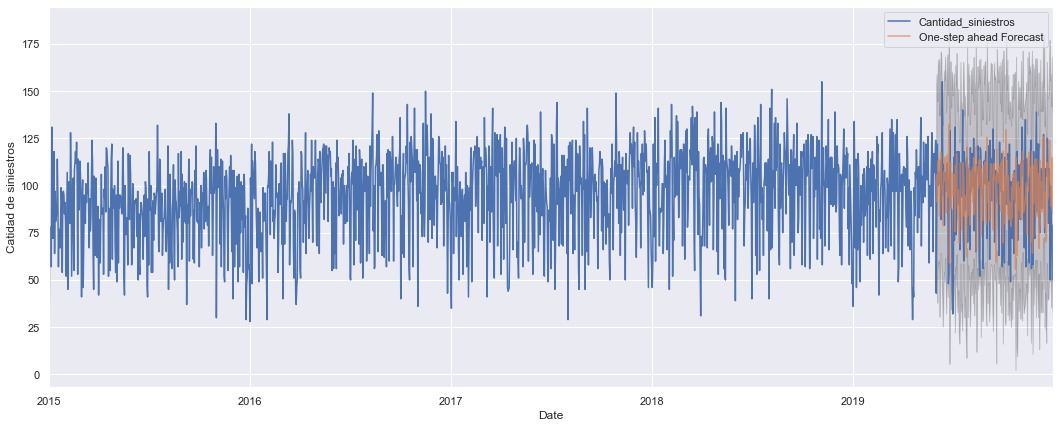

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2019-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(18, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Catidad de siniestros')
plt.legend()
plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-11-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2019-06-01 00:00:00   NaN
2019-06-02 00:00:00   NaN
2019-06-03 00:00:00   NaN
2019-06-04 00:00:00   NaN
2019-06-05 00:00:00   NaN
                       ..
2019-12-28 00:00:00   NaN
2019-12-29 00:00:00   NaN
2019-12-30 00:00:00   NaN
2019-12-31 00:00:00   NaN
Cantidad_siniestros   NaN
Length: 215, dtype: float64


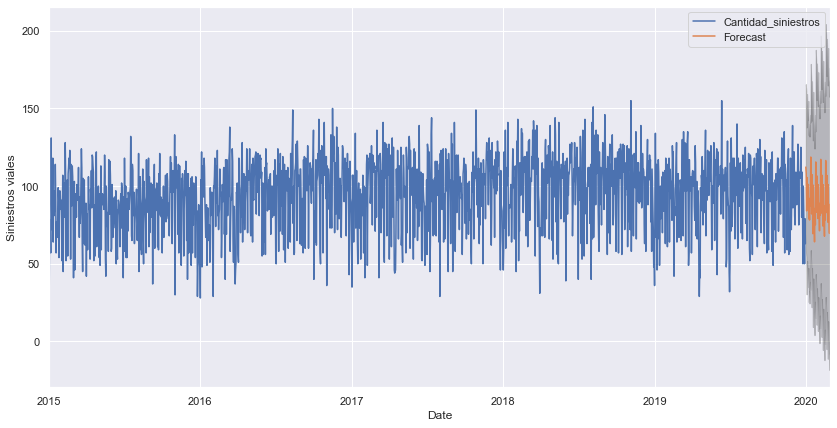

In [26]:
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Siniestros viales')
plt.legend()
plt.show()

In [32]:
pred_uc.

In [34]:
pred_uc.predicted_mean

2020-01-01    112.245173
2020-01-02    108.007658
2020-01-03     84.025439
2020-01-04    105.559829
2020-01-05     98.109538
2020-01-06     88.700884
2020-01-07    101.081836
2020-01-08     79.065961
2020-01-09     86.151744
2020-01-10     78.167630
2020-01-11     92.119973
2020-01-12     87.154922
2020-01-13    118.721519
2020-01-14    109.587254
2020-01-15     82.084996
2020-01-16    107.364051
2020-01-17     93.117381
2020-01-18     69.367635
2020-01-19    100.617871
2020-01-20     81.117901
2020-01-21     74.617766
2020-01-22     64.117741
2020-01-23     85.617816
2020-01-24     75.117761
2020-01-25    115.551729
2020-01-26    108.873618
2020-01-27     83.136971
2020-01-28    106.537745
2020-01-29     95.700061
2020-01-30     79.143642
2020-01-31    100.929261
2020-02-01     80.167343
2020-02-02     80.481748
2020-02-03     71.243675
2020-02-04     88.957895
2020-02-05     81.234134
2020-02-06    117.220331
2020-02-07    109.310241
2020-02-08     82.687984
2020-02-09    107.030882
